## Projet CRM Matser IMSD

### Manipulation de données

import pandas as pd 
import sqlite3
import math

In [300]:
# Connexion à la base de données factbook.db
import sqlite3
# Importing libraries necessary for this analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
# Connexion à la base de données factbook.db
connexion = sqlite3.connect('batch_1.db')

In [302]:
# Lecture des données de la table facts dans un tableau pandas
comp = pd.read_sql_query('SELECT * FROM compagnies;', con = connexion)
comp.head()

,COMPAGNIE,CODE
0,Try Hard Airlines,THA
1,Corporate Overlord Airways,COA
2,Neverland Airlines,NA
3,Always A Problem Flights,AAPF
4,Overpriced Air,OA


In [303]:
comp.shape

(13, 2)

In [304]:
# Lecture des données de la table facts dans un tableau pandas
aer = pd.read_sql_query('SELECT * FROM aeroports;', con = connexion)
aer.head()

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 10 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,6695,361
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,1061,71
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,2402,909
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,8641,550
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,6883,870


In [305]:
# Lecture des données de la table facts dans un tableau pandas
vol = pd.read_sql_query('SELECT * FROM vols;', con = connexion)
vol.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,None,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,6/1/2018,10,NA
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,84.0,69.0,50.0,337,2323.0,5.0,2350,2328.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9/1/2016,10,THA
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,71.0,66.0,45.0,252,1818.0,7.0,1841,1825.0,-16.0,0,0,None,NaN,NaN,NaN,NaN,NaN,23/1/2016,10,MAF


#  Processing pour avoir la base de données finale
Ajout des colonnes des prix qui se trouvent dans la table aer dans vol

In [306]:
data=aer[['CODE IATA', 
       'PRIX RETARD PREMIERE 10 MINUTES',
       'PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES', 'LIEU', 'PAYS']]

In [307]:
retart_10_min =aer.iloc[:,:-1].set_index(
        'CODE IATA').to_dict()['PRIX RETARD PREMIERE 10 MINUTES']

retart_apres_10_min = aer.loc[:,['CODE IATA',
        'PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']].set_index(
        'CODE IATA').to_dict()['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']

VILLES= aer.loc[:,['CODE IATA','LIEU']].set_index('CODE IATA').to_dict() ['LIEU']

PAYS= aer.loc[:,['CODE IATA','PAYS']].set_index('CODE IATA').to_dict() ['PAYS']


vol["PRIX_DEP_RP_10MIN"] = vol['AEROPORT DEPART'].apply(lambda x : retart_10_min[x])
vol["PRIX_ARIV_RP_10MIN"] = vol['AEROPORT ARRIVEE'].apply(lambda x : retart_10_min[x])

vol["PRIX_DEP_RCMA_10MIN"] = vol['AEROPORT DEPART'].apply(lambda x : retart_apres_10_min[x])
vol["PRIX_ARIV_RCMA_10MIN"] = vol['AEROPORT ARRIVEE'].apply(lambda x : retart_apres_10_min[x])

vol["VILLES"] = vol['AEROPORT DEPART'].apply(lambda x : VILLES[x])
vol["VILLES"] = vol['AEROPORT ARRIVEE'].apply(lambda x : VILLES[x])

vol["PAYS"] = vol['AEROPORT DEPART'].apply(lambda x : PAYS[x])
vol["PAYS"] = vol['AEROPORT ARRIVEE'].apply(lambda x : PAYS[x])

#

vol.shape

(3000000, 36)

In [308]:
vol.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,VILLES,PAYS
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA,4582,5499,586,120,Dakar,SN
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,None,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA,4778,3147,12,278,Bournemouth,GB
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,6/1/2018,10,NA,352,2066,849,795,Jinan,CN
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,84.0,69.0,50.0,337,2323.0,5.0,2350,2328.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9/1/2016,10,THA,5077,2151,48,685,Berlin,DE
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,71.0,66.0,45.0,252,1818.0,7.0,1841,1825.0,-16.0,0,0,None,NaN,NaN,NaN,NaN,NaN,23/1/2016,10,MAF,2143,8346,434,353,Aalborg,DK


In [10]:
#vérification du nombre de valeurs manquantes
vol.apply(lambda x: sum(x.isnull()),axis=0)

IDENTIFIANT                                            0
VOL                                                    0
CODE AVION                                             0
AEROPORT DEPART                                        0
AEROPORT ARRIVEE                                       0
DEPART PROGRAMME                                       0
HEURE DE DEPART                                    49226
RETART DE DEPART                                   49226
TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE          51070
DECOLLAGE                                          51070
TEMPS PROGRAMME                                        6
TEMPS PASSE                                        59585
TEMPS DE VOL                                       59585
DISTANCE                                               0
ATTERRISSAGE                                       52876
TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE      52876
ARRIVEE PROGRAMMEE                                     0
HEURE D'ARRIVEE                

In [11]:
df = vol.drop(["RAISON D'ANNULATION", "RETARD SYSTEM","RETARD SECURITE","RETARD COMPAGNIE","RETARD AVION","RETARD METEO"], axis=1) 
df.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,...,ANNULATION,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,VILLES,PAYS
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,...,0,10/4/2016,10,NVPPA,4582,5499,586,120,Dakar,SN
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,...,0,16/7/2018,10,COA,4778,3147,12,278,Bournemouth,GB
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,...,0,6/1/2018,10,NA,352,2066,849,795,Jinan,CN
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,...,0,9/1/2016,10,THA,5077,2151,48,685,Berlin,DE
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,...,0,23/1/2016,10,MAF,2143,8346,434,353,Aalborg,DK


In [12]:
# Removing rows with missing values    
df = df[~pd.isnull(df).any(axis=1)]
print(df.shape)

(2940415, 30)


In [13]:
df.describe()

,IDENTIFIANT,VOL,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,...,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,NIVEAU DE SECURITE,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN
count,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06,...,2.940415e+06,2.940415e+06,2.940415e+06,2940415.0,2940415.0,2940415.0,2.940415e+06,2.940415e+06,2.940415e+06,2.940415e+06
mean,2.600632e+06,2.263366e+03,1.327955e+03,1.332992e+03,9.375346e+00,1.725067e+01,1.355730e+03,1.461290e+02,1.416684e+02,1.166334e+02,...,1.492806e+03,1.476842e+03,4.914760e+00,0.0,0.0,10.0,5.111439e+03,5.111869e+03,4.754675e+02,4.756621e+02
std,1.725110e+06,1.822156e+03,4.852781e+02,4.980412e+02,3.894315e+01,9.256521e+00,5.002628e+02,7.920409e+01,7.815676e+01,7.636377e+01,...,5.049938e+02,5.237271e+02,4.140800e+01,0.0,0.0,0.0,2.714838e+03,2.714837e+03,2.791050e+02,2.790296e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.500000e+01,7.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.0,0.0,10.0,1.050000e+02,1.050000e+02,1.100000e+01,1.100000e+01
25%,1.030242e+06,7.740000e+02,9.150000e+02,9.200000e+02,-5.000000e+00,1.200000e+01,9.360000e+02,8.800000e+01,8.500000e+01,6.000000e+01,...,1.110000e+03,1.100000e+03,-1.400000e+01,0.0,0.0,10.0,2.401000e+03,2.401000e+03,2.560000e+02,2.560000e+02
50%,2.075032e+06,1.721000e+03,1.323000e+03,1.329000e+03,-2.000000e+00,1.500000e+01,1.342000e+03,1.250000e+02,1.220000e+02,9.600000e+01,...,1.519000e+03,1.512000e+03,-5.000000e+00,0.0,0.0,10.0,5.389000e+03,5.389000e+03,4.850000e+02,4.850000e+02
75%,4.273272e+06,3.391000e+03,1.730000e+03,1.738000e+03,7.000000e+00,2.000000e+01,1.752000e+03,1.790000e+02,1.750000e+02,1.480000e+02,...,1.916000e+03,1.916000e+03,8.000000e+00,0.0,0.0,10.0,7.791000e+03,7.791000e+03,6.950000e+02,6.950000e+02
max,5.332913e+06,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.000000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,...,2.359000e+03,2.400000e+03,1.971000e+03,0.0,0.0,10.0,9.877000e+03,9.877000e+03,9.950000e+02,9.950000e+02


In [13]:
import datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['Dayofweek'] = df['DATE'].dt.weekday
df['week'] = df['DATE'].dt.week
df['n_days'] = df['DATE'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

## Recodage des valeurs des variables Dayofweek et month

In [14]:
    #df["RETARD A L'ARRIVEE"] = [0 if x < 0 else x for x in df["RETARD A L'ARRIVEE"]]
# Add a column for days
    df['Days'] = ['Lun' if x in [0] else
                               ('Mar' if x in [1] else
                               ('Mer' if x in [2] else 
                               ('Jeu' if x in [3] else
                               ('Ven' if x in [4] else
                               ('Sam' if x in [5] else 
                                'Dim' ))))) for x in df['Dayofweek']] 
     # Add a column for months
    df['Months'] = ['Jan' if x in [1] else
                                 ('Feb' if x in [2] else 
                                 ('Mar' if x in [3] else
                                 ('Apr' if x in [4] else
                                 ('May' if x in [5] else 
                                 ('Jun' if x in [6] else
                                 ('Jul' if x in [7] else
                                 ('Aug' if x in [8] else 
                                 ('Sep' if x in [9] else
                                 ('Oct' if x in [10] else
                                 ('Nov' if x in [11] else 
                                 'Dec' )))))))))) for x in df['month']] 

In [15]:
print(df.columns)

Index(['IDENTIFIANT', 'VOL', 'CODE AVION', 'AEROPORT DEPART',
       'AEROPORT ARRIVEE', 'DEPART PROGRAMME', 'HEURE DE DEPART',
       'RETART DE DEPART', 'TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE',
       'DECOLLAGE', 'TEMPS PROGRAMME', 'TEMPS PASSE', 'TEMPS DE VOL',
       'DISTANCE', 'ATTERRISSAGE',
       'TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE', 'ARRIVEE PROGRAMMEE',
       'HEURE D'ARRIVEE', 'RETARD A L'ARRIVEE', 'DETOURNEMENT', 'ANNULATION',
       'DATE', 'NIVEAU DE SECURITE', 'COMPAGNIE AERIENNE', 'PRIX_DEP_RP_10MIN',
       'PRIX_ARIV_RP_10MIN', 'PRIX_DEP_RCMA_10MIN', 'PRIX_ARIV_RCMA_10MIN',
       'VILLES', 'PAYS', 'year', 'month', 'day', 'Dayofweek', 'week', 'n_days',
       'Days', 'Months'],
      dtype='object')


In [16]:
df.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,...,VILLES,PAYS,year,month,day,Dayofweek,week,n_days,Days,Months
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,...,Dakar,SN,2016,10,4,1,40,17078,Mar,Oct
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,...,Bournemouth,GB,2018,7,16,0,29,17728,Lun,Jul
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,...,Jinan,CN,2018,6,1,4,22,17683,Ven,Jun
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,...,Berlin,DE,2016,9,1,3,35,17045,Jeu,Sep
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,...,Aalborg,DK,2016,1,23,5,3,16823,Sam,Jan


## Création d'une variable binaire

In [177]:
df['RetArr15'] = df["RETARD A L'ARRIVEE"].apply(lambda x : (0 if x < 15 else 1))

In [185]:
df["RetArr15"].value_counts()

0    2380184
1     560231
Name: RetArr15, dtype: int64

In [186]:
np.sum(df["RetArr15"])

560231

In [187]:
len(df["RetArr15"])

2940415

## Analyse exploratoire

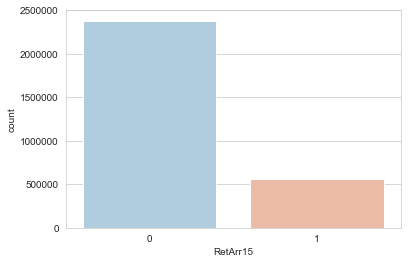

In [310]:
sns.set_style('whitegrid')
sns.countplot(x='RetArr15',data=df,palette='RdBu_r')

<Figure size 1500x500 with 0 Axes>

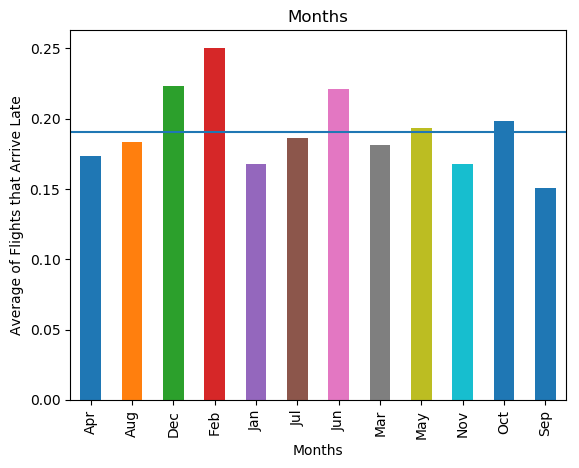

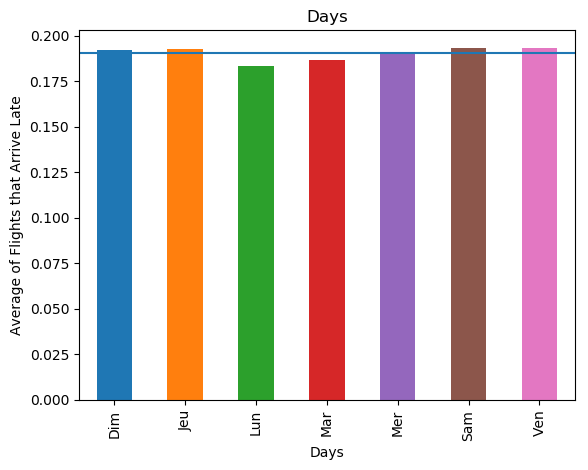

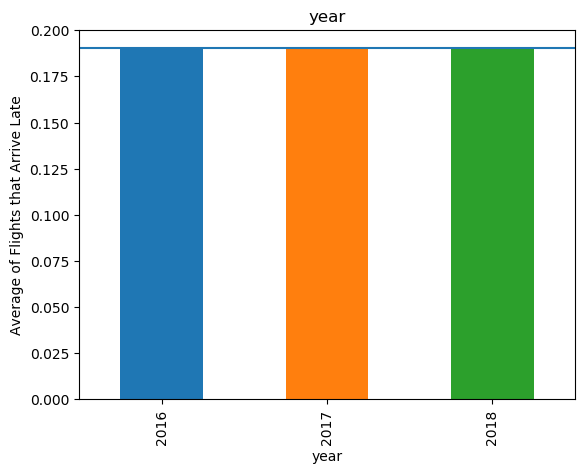

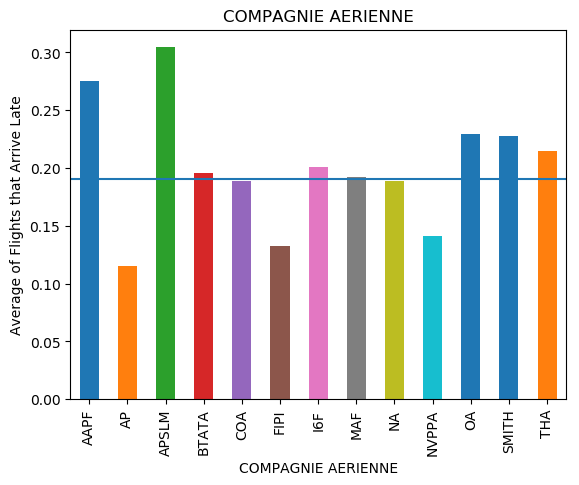

In [180]:
# Proportion of late flights per category based on all other flights

avgLate = np.sum(df["RetArr15"])/len(df["RetArr15"])
attributes = ['Months','Days', 'year','COMPAGNIE AERIENNE']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = df.groupby([pred], as_index=False).aggregate(np.mean)[[pred, "RetArr15"]]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y="RetArr15")
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Average of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

In [29]:
# Splitting week column into weekend and weekdays
def Impute_week(cols):
    if cols in [5,6]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
df['Week'] = df["Dayofweek"].apply(Impute_week)
df.drop("Dayofweek", axis = 1, inplace = True)

In [188]:
week_grouped1 = df.groupby('Week')["RetArr15"].sum()
week_grouped2 = df.groupby('Week')["RetArr15"].count()
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probabilité de RETARD A L'ARRIVEE"] =week_grouped["sum"]/week_grouped["count"] 

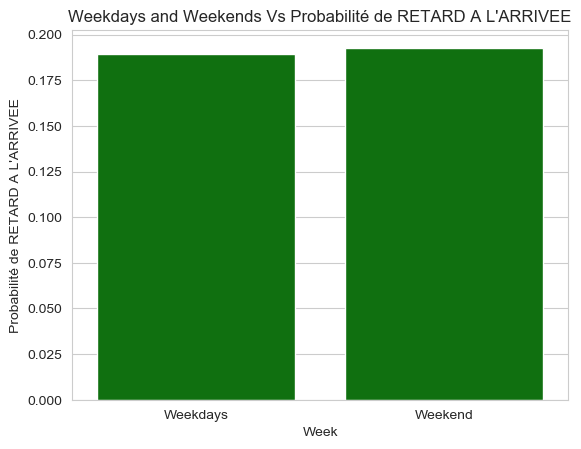

In [189]:
sns.set_style('whitegrid')
sns.barplot(x=week_grouped.index, y ="Probabilité de RETARD A L'ARRIVEE", data=week_grouped, color ='green')
plt.ylabel("Probabilité de RETARD A L'ARRIVEE")
fig = plt.title("Weekdays and Weekends Vs Probabilité de RETARD A L'ARRIVEE")

In [214]:
abbr_companies = comp.set_index('CODE')['COMPAGNIE'].to_dict()

In [218]:
import matplotlib.gridspec as gridspec
# compute parameters
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = df['RETART DE DEPART'].groupby(df['COMPAGNIE AERIENNE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
COMPAGNIE AERIENNE,,,,
BTATA,40139.0,644.0,9.181370,-24.0
AP,50176.0,1433.0,0.585479,-27.0
AAPF,58877.0,996.0,14.393889,-46.0
APSLM,75466.0,836.0,16.531511,-35.0
FIPI,112811.0,963.0,1.896624,-82.0
NA,139785.0,759.0,6.102350,-28.0
OA,172845.0,1006.0,11.821713,-26.0
SMITH,183849.0,1278.0,10.592176,-36.0
THA,332233.0,1314.0,15.002784,-24.0


C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to 

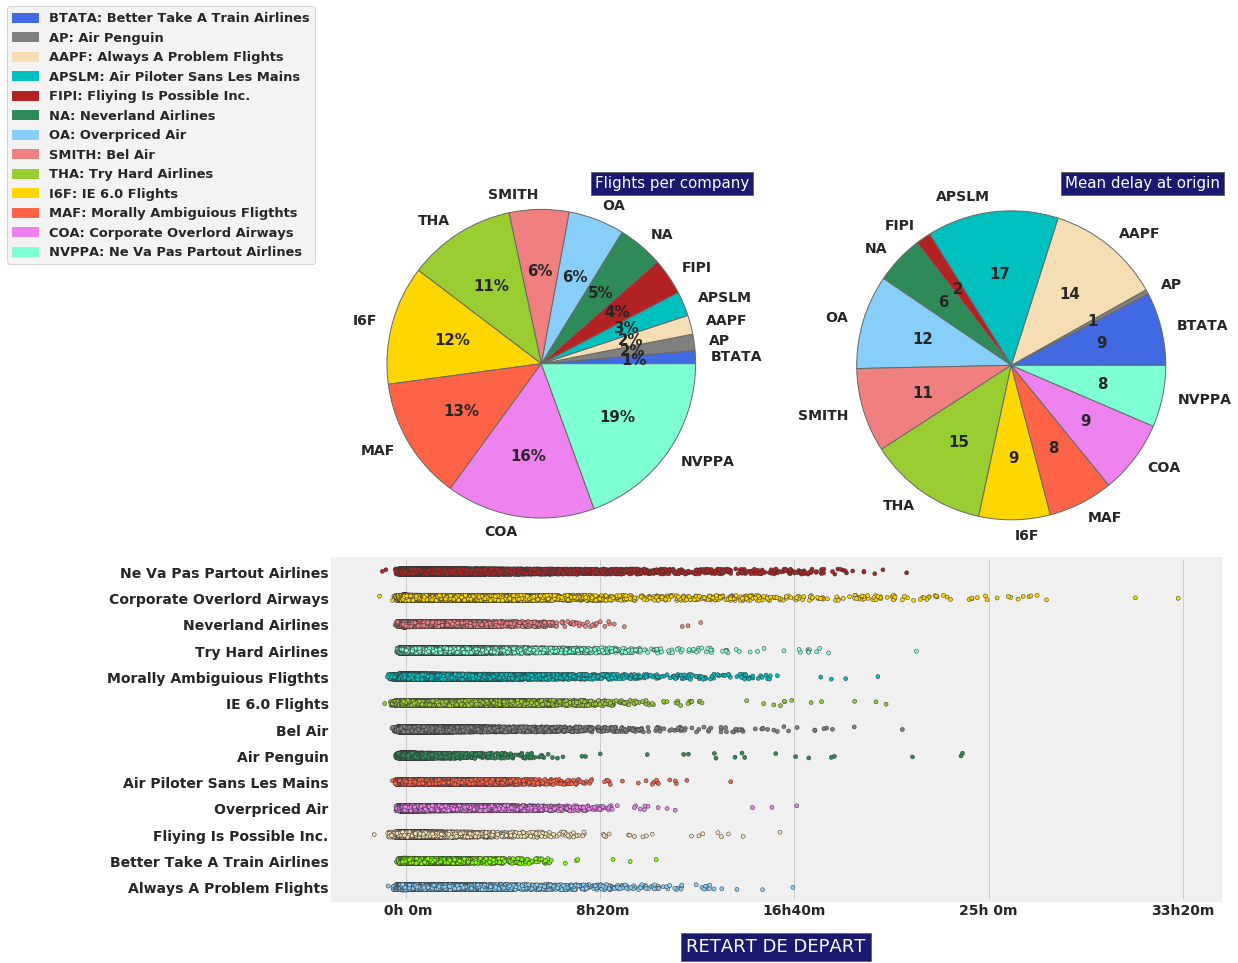

In [34]:
# graphics
from IPython.core.interactiveshell import InteractiveShell
import matplotlib as mpl
import matplotlib.gridspec as gridspec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

df2 = df.loc[:, ['COMPAGNIE AERIENNE', 'RETART DE DEPART']]
df2['COMPAGNIE AERIENNE'] = df2['COMPAGNIE AERIENNE'].replace(abbr_companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=gridspec.GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

# 1.number of flights
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
    ax1.axis('equal')
ax1.set_title('Flights per company', bbox={'facecolor':'midnightblue'},
              color = 'w',fontsize=15,loc ='right')
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

# 2.mean delay at departure
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue'},
              color='w', fontsize=15, loc='right')
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
ax3 = sns.stripplot(y="COMPAGNIE AERIENNE", x="RETART DE DEPART", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('RETART DE DEPART', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3)

C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Hass\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


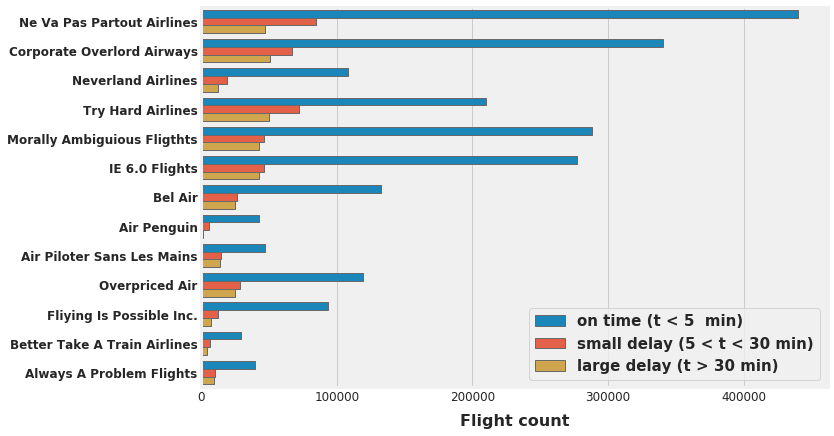

In [35]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 30]
df['DELAY_LEVEL'] = df['RETART DE DEPART'].apply(delay_type)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="COMPAGNIE AERIENNE", hue='DELAY_LEVEL', data=df)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5  min)')
L.get_texts()[1].set_text('small delay (5 < t < 30 min)')
L.get_texts()[2].set_text('large delay (t > 30 min)')
plt.show()

In [36]:
## Group by Origin and the number of Delayed and Cancelled flights
#df_group_by_origin_cancel = df_top_origins.groupby(by='Origin').agg({'Delayed': ['count', 'sum'], 
#                                                                     'Cancelled': ['sum']})
## Calculate the percentage of delayed and cancelled flights
#df_group_by_origin_cancel['delayed_perc'] = df_group_by_origin_cancel.Delayed_sum/df_group_by_origin_cancel['count'] * 100.
#df_group_by_origin_cancel['cancelled_perc'] = df_group_by_origin_cancel.Cancelled_sum/df_group_by_origin_cancel['count'] * 100.
#
#sns.barplot(df_group_by_origin_cancel.sort(by='delayed_perc', ascending=False)['Origin'].tolist()[:11],
#            df_group_by_origin_cancel.sort(by='delayed_perc', ascending=False)['delayed_perc'].tolist()[:11])
#sns.barplot(df_group_by_origin_cancel.sort(by='cancelled_perc', ascending=False)['Origin'].tolist()[:11],
#            df_group_by_origin_cancel.sort(by='cancelled_perc', ascending=False)['cancelled_perc'].tolist()[:11])

In [37]:
#flights_years = df.year.value_counts()
#sns.kdeplot(x=flights_years.index, y=flights_years.values)

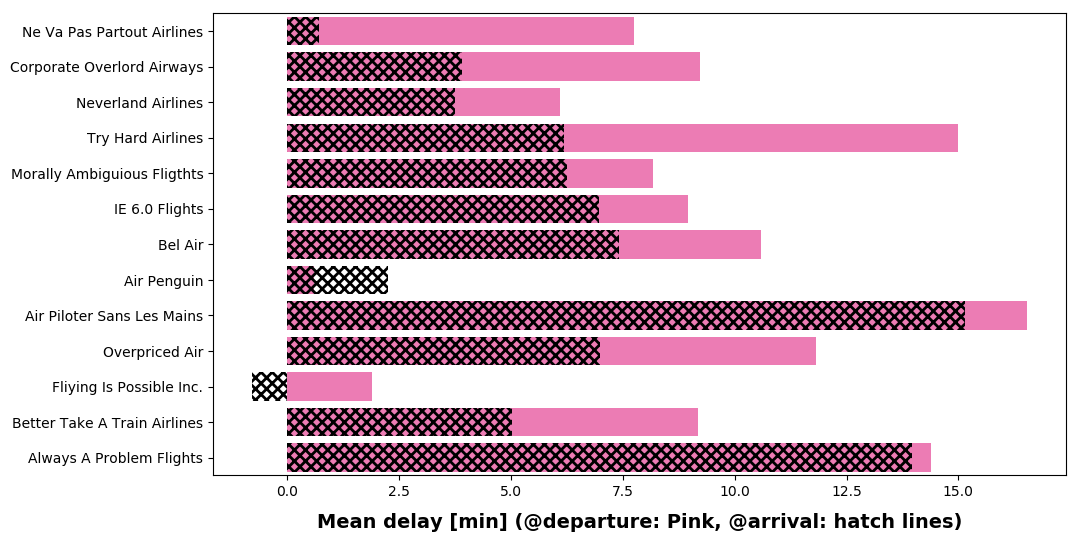

In [38]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="RETART DE DEPART", y="COMPAGNIE AERIENNE", data=df, color="hotpink", ci=None)
ax = sns.barplot(x="RETARD A L'ARRIVEE", y="COMPAGNIE AERIENNE", data=df, color="y", hatch = 'xxx',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: Pink, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

## Apprentissage non supervisé

In [249]:
data=df.groupby(df['COMPAGNIE AERIENNE'])[["TEMPS PASSE","TEMPS DE VOL","DEPART PROGRAMME","ATTERRISSAGE","TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE","DISTANCE","RETARD A L'ARRIVEE","PRIX_DEP_RCMA_10MIN", "PRIX_ARIV_RCMA_10MIN", "PRIX_DEP_RP_10MIN","PRIX_ARIV_RP_10MIN"]].mean()
data.head()

,TEMPS PASSE,TEMPS DE VOL,DEPART PROGRAMME,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,DISTANCE,RETARD A L'ARRIVEE,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN
COMPAGNIE AERIENNE,,,,,,,,,,,
AAPF,155.322112,130.396590,1385.662347,1470.609253,9.137949,967.459704,13.961853,532.708137,532.554036,5842.826452,5840.850332
AP,103.062002,85.265944,1304.915936,1419.397162,6.844029,634.485371,2.241709,315.600426,316.479233,7075.565729,7078.867327
APSLM,156.648862,132.438012,1357.290502,1435.013874,9.543874,985.918705,15.145456,389.508136,389.741009,5113.909058,5121.355776
BTATA,205.858143,182.871521,1350.194823,1543.835272,8.166546,1405.679015,5.011111,512.427116,513.423977,4057.764917,4057.157577
COA,167.244290,140.610588,1312.520007,1486.496416,8.889258,1048.344151,3.900326,575.370211,575.626080,5530.574070,5533.367746


In [250]:
data.shape

(13, 11)

In [251]:
data1=df.groupby(df['VILLES'])[["RETART DE DEPART",'HEURE DE DEPART',"HEURE D'ARRIVEE","TEMPS PASSE","TEMPS DE VOL","TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE","DISTANCE","DEPART PROGRAMME","RETARD A L'ARRIVEE","PRIX_DEP_RCMA_10MIN", "PRIX_ARIV_RCMA_10MIN", "PRIX_DEP_RP_10MIN","PRIX_ARIV_RP_10MIN"]].mean()
data1.head()

,RETART DE DEPART,HEURE DE DEPART,HEURE D'ARRIVEE,TEMPS PASSE,TEMPS DE VOL,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,DISTANCE,DEPART PROGRAMME,RETARD A L'ARRIVEE,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN
VILLES,,,,,,,,,,,,,
Aalborg,7.561220,1220.709593,1418.276165,137.864133,114.656260,5.723821,831.861545,1212.341870,3.074024,503.830488,353.0,5482.302439,8346.0
Abu Dhabi,8.375812,1511.621753,1599.936688,50.198052,27.974026,3.785714,146.650162,1503.830357,1.487013,295.091721,362.0,7615.405032,5826.0
Abuja,10.644976,1496.915150,1585.633307,79.188884,56.829312,5.089201,364.529272,1485.922073,9.498813,331.724881,272.0,3889.116891,6338.0
Accra,15.711712,1621.055856,304.499099,192.091892,171.246847,4.365766,1371.562162,2312.947748,10.603604,625.971171,955.0,4183.405405,2880.0
Ad Dammam,6.633199,1430.860662,1563.035476,178.821534,157.414750,4.357359,1162.255323,1430.394700,1.264688,511.964097,613.0,5041.614198,8285.0


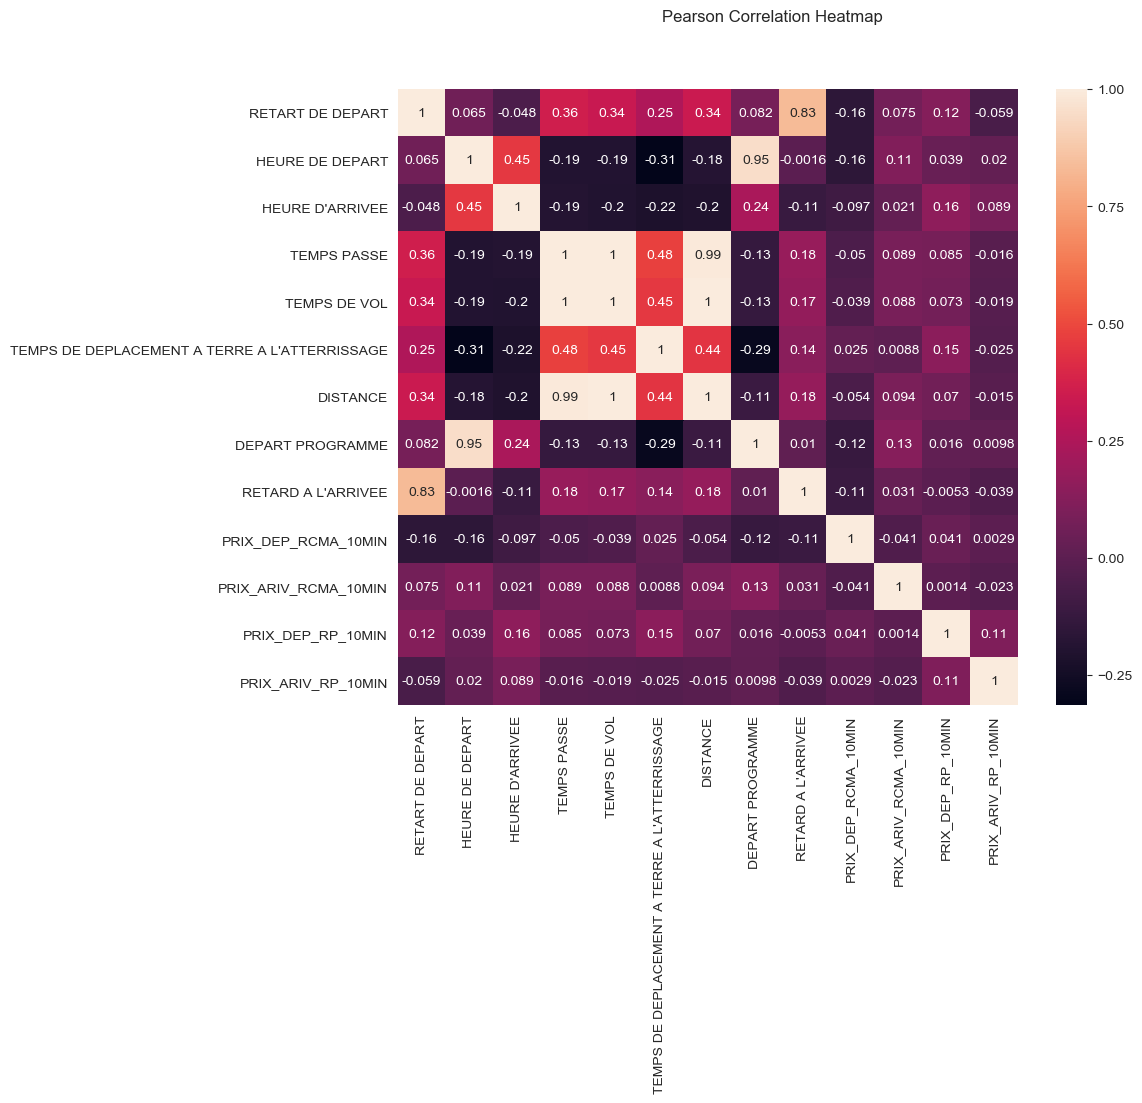

In [252]:
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), annot=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

## Kmeans sur les villes desservies

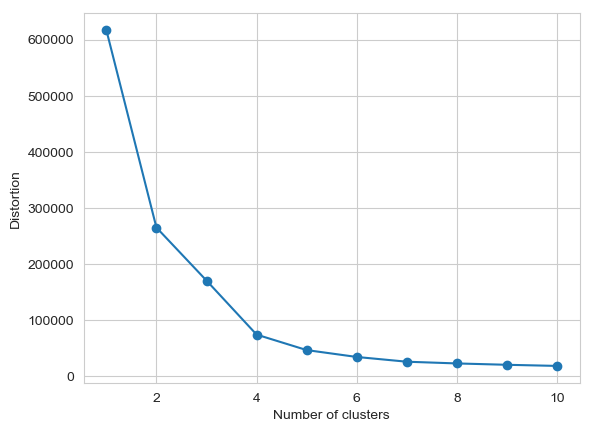

In [253]:
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 100)
x = data1.iloc[:, [0,4]].values

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

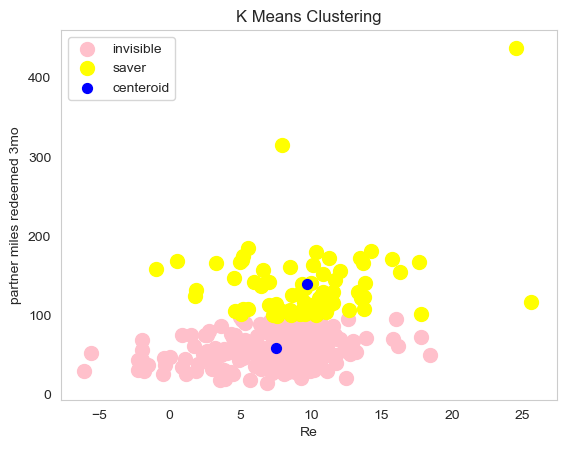

In [254]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'invisible')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'saver')
#plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Re')
plt.ylabel('partner miles redeemed 3mo')
plt.legend()
plt.grid()
plt.show();

##  ACP avec les compagines aériennes

In [255]:
#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]


In [256]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(data)
print(Z)

[[ 0.22873262  0.2101747   2.27933537  0.0745515   1.18002771  0.21253728
   1.82111201  0.68294295  0.67889017  0.65331072  0.64970308]
 [-1.2137596  -1.04231349 -1.36159409 -1.61092579 -0.92967662 -0.8826467
  -0.8527772  -2.1110781  -2.10567134  2.10948032  2.11116018]
 [ 0.26535378  0.26682927  1.00002294 -1.09695316  1.55335496  0.27325067
   2.09114495 -1.1599387  -1.16154496 -0.20772078 -0.19964748]
 [ 1.62363651  1.66648519  0.6800723   2.48454473  0.28663469  1.65388191
  -0.22095263  0.4219407   0.4323606  -1.4552879  -1.45591458]
 [ 0.55781054  0.4936387  -1.01871958  0.59742515  0.95130805  0.47857385
  -0.4743725   1.23197334  1.2339607   0.28446352  0.28672534]
 [ 0.89407231  0.97572195 -0.01710162  0.73960233 -1.37561757  0.97474401
  -1.54555665  0.56754242  0.56343169  0.79974051  0.79626361]
 [-1.3724296  -1.38456014 -0.72939561 -0.10389677 -0.20298921 -1.4476473
   0.2240437  -0.7843158  -0.78939578 -0.33815008 -0.34103873]
 [-1.27638407 -1.30733223 -0.21766351 -0.00

In [257]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [258]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [259]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 11

11


In [260]:
#variance expliquée
print(acp.explained_variance_)

[5.02645909e+00 2.21125786e+00 1.72865019e+00 1.54739393e+00
 9.18231983e-01 4.26218925e-01 5.76149191e-02 6.43313747e-04
 1.93900474e-04 1.71387261e-06 8.41315993e-07]


In [261]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.63980839e+00 2.04116110e+00 1.59567710e+00 1.42836363e+00
 8.47598753e-01 3.93432854e-01 5.31830023e-02 5.93828074e-04
 1.78985053e-04 1.58203625e-06 7.76599378e-07]


In [262]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[4.63980839e+00 2.04116110e+00 1.59567710e+00 1.42836363e+00
 8.47598753e-01 3.93432854e-01 5.31830023e-02 5.93828074e-04
 1.78985053e-04 1.58203625e-06 7.76599378e-07]


In [263]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[4.21800763e-01 1.85560100e-01 1.45061554e-01 1.29851239e-01
 7.70544321e-02 3.57666231e-02 4.83481839e-03 5.39843703e-05
 1.62713684e-05 1.43821477e-07 7.05999435e-08]


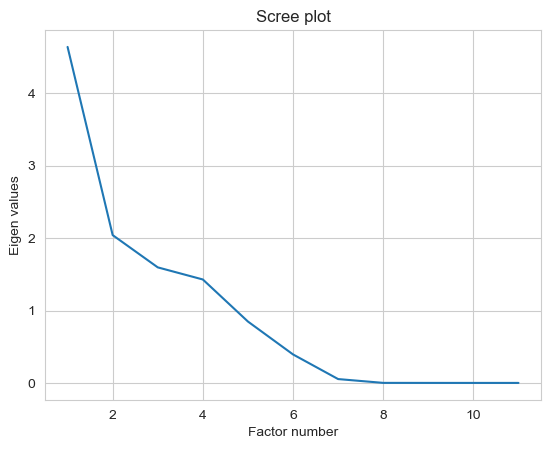

In [264]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

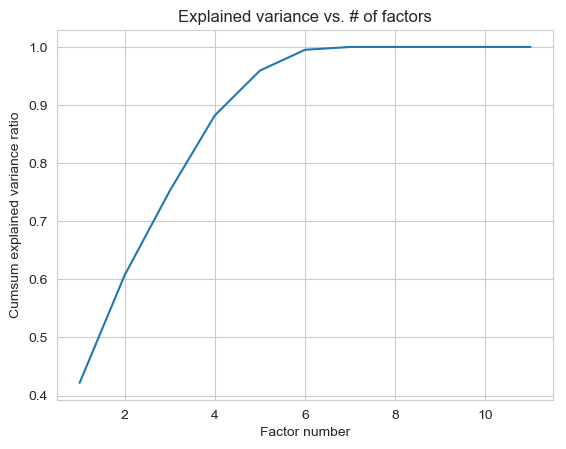

In [265]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [266]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [267]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   4.639808e+00  3.019877
1   2.041161e+00  2.019877
2   1.595677e+00  1.519877
3   1.428364e+00  1.186544
4   8.475988e-01  0.936544
5   3.934329e-01  0.736544
6   5.318300e-02  0.569877
7   5.938281e-04  0.427020
8   1.789851e-04  0.302020
9   1.582036e-06  0.190909
10  7.765994e-07  0.090909


## Représentation des individus

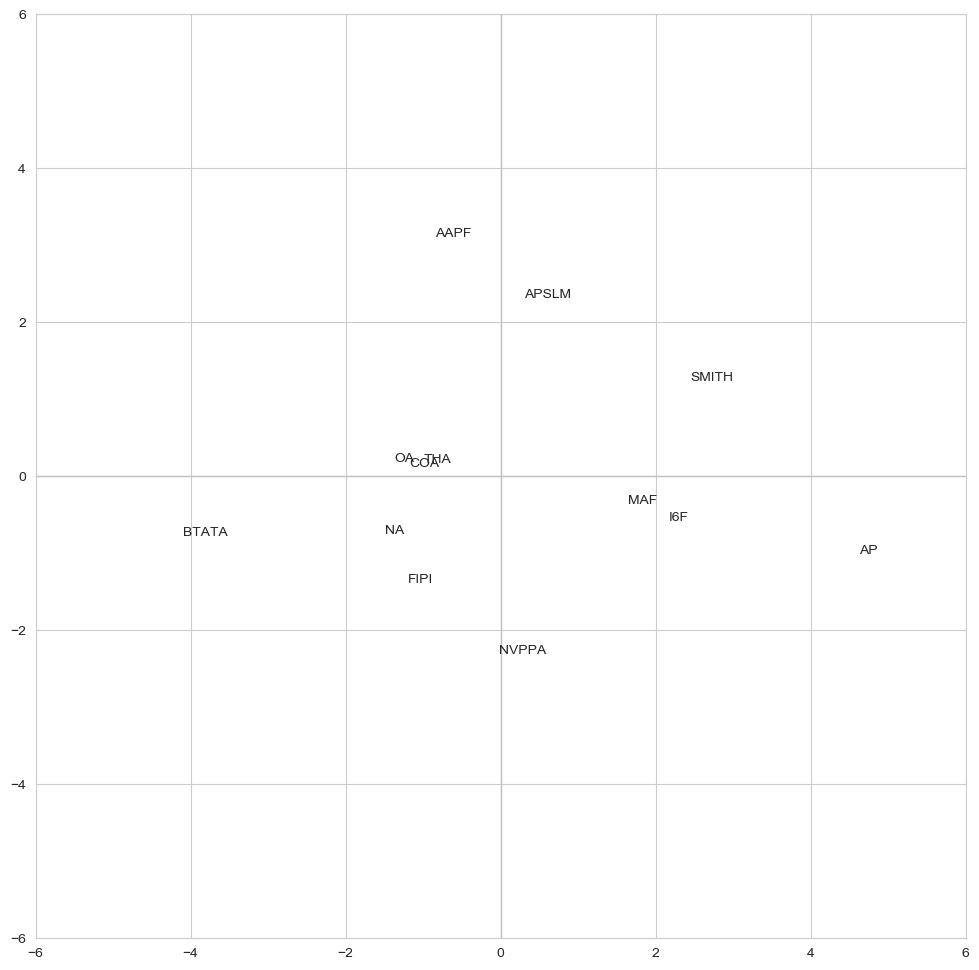

In [268]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [269]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

       ID        d_i
0    AAPF  11.827738
1      AP  27.176650
2   APSLM  11.983079
3   BTATA  19.517654
4     COA   6.512136
5    FIPI   9.443078
6     I6F   7.999415
7     MAF   5.910336
8      NA   5.922325
9   NVPPA  10.632249
10     OA   8.509010
11  SMITH  11.781220
12    THA   5.785111


In [270]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

       id    COS2_1    COS2_2
0    AAPF  0.060996  0.819470
1      AP  0.787157  0.037106
2   APSLM  0.007779  0.449877
3   BTATA  0.859277  0.030127
4     COA  0.213047  0.002117
5    FIPI  0.151855  0.203647
6     I6F  0.589774  0.041595
7     MAF  0.458372  0.021687
8      NA  0.375200  0.095499
9   NVPPA  0.000041  0.498874
10     OA  0.222281  0.004190
11  SMITH  0.508961  0.129219
12    THA  0.169585  0.005146


In [271]:
#vérifions la théorie - somme en ligne des cos2 = 1
cos=np.sum(cos2,axis=1)

In [272]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

       id     CTR_1     CTR_2
0    AAPF  0.011961  0.365270
1      AP  0.354661  0.038003
2   APSLM  0.001545  0.203162
3   BTATA  0.278047  0.022160
4     COA  0.023001  0.000520
5    FIPI  0.023774  0.072472
6     I6F  0.078217  0.012539
7     MAF  0.044915  0.004830
8      NA  0.036839  0.021314
9   NVPPA  0.000007  0.199892
10     OA  0.031357  0.001344
11  SMITH  0.099410  0.057371
12    THA  0.016265  0.001122


In [273]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Représentation des variables

In [274]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[-4.16243126e-01 -4.07266795e-01 -2.24141085e-01 -3.24053660e-01
  -4.07712070e-02 -3.96404022e-01  4.47864799e-03 -2.90638107e-01
  -2.92231319e-01  2.97535177e-01  2.97338332e-01]
 [ 4.68539349e-03 -7.91670153e-03  3.96814479e-01 -2.30759306e-01
   4.98422755e-01 -1.44793791e-02  6.44097595e-01  1.57971645e-01
   1.56361057e-01  1.95011589e-01  1.95637003e-01]
 [ 1.51311176e-01  1.63954472e-01 -2.13855931e-01 -7.48892829e-02
  -1.29413953e-01  1.73525654e-01 -2.72162303e-01  3.30178687e-01
   3.30220425e-01  5.29147831e-01  5.29045112e-01]
 [ 3.25407456e-01  3.58310393e-01  7.05612123e-02 -1.73359089e-01
   7.32941712e-03  3.91499524e-01  4.71262593e-02 -5.10948100e-01
  -5.08344650e-01  1.65814669e-01  1.67833732e-01]
 [-2.97914716e-02 -1.18238118e-02  5.56075995e-01 -3.84723852e-01
  -7.25468097e-01 -2.18022674e-02  5.96827301e-02  7.11025704e-02
   7.24710437e-02 -2.34300681e-02 -2.32763681e-02]
 [-1.34509995e-01 -9.53106627e-02  4.85898817e-01  7.50733075e-01
  -6.30297569e-02 -

In [275]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [276]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[-8.96596621e-01  6.69398464e-03  1.91136448e-01  3.88908013e-01
  -2.74275561e-02 -8.43703532e-02 -7.88051583e-03 -1.82711983e-02
   4.53177537e-03  3.56291122e-05  7.12318787e-06]
 [-8.77261410e-01 -1.13105289e-02  2.07107475e-01  4.28231684e-01
  -1.08856073e-02 -5.97828756e-02 -1.39947785e-02  1.76628657e-03
  -1.08230076e-02  8.50776366e-05  3.54055239e-05]
 [-4.82804705e-01  5.66925709e-01 -2.70143054e-01  8.43306457e-02
   5.11952069e-01  3.04776273e-01  1.02089566e-01 -3.90558445e-04
  -3.52484267e-05  7.25257634e-06  5.87896883e-07]
 [-6.98018534e-01 -3.29683996e-01 -9.46002269e-02 -2.07188672e-01
  -3.54196501e-01  4.70891511e-01 -7.07683139e-02 -2.84656188e-04
   1.67052779e-04  8.98979194e-08 -1.82726160e-06]
 [-8.78220542e-02  7.12092650e-01 -1.63475852e-01  8.75969188e-03
  -6.67903121e-01 -3.95349272e-02  1.03694195e-01  3.17413433e-04
  -2.85518629e-04  6.39782262e-06  1.77753602e-06]
 [-8.53862765e-01 -2.06865745e-02  2.19197802e-01  4.67897398e-01
  -2.00722851e-02 -

In [277]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                                               id     COR_1     COR_2
0                                     TEMPS PASSE -0.896597  0.006694
1                                    TEMPS DE VOL -0.877261 -0.011311
2                                DEPART PROGRAMME -0.482805  0.566926
3                                    ATTERRISSAGE -0.698019 -0.329684
4   TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE -0.087822  0.712093
5                                        DISTANCE -0.853863 -0.020687
6                              RETARD A L'ARRIVEE  0.009647  0.920217
7                             PRIX_DEP_RCMA_10MIN -0.626041  0.225693
8                            PRIX_ARIV_RCMA_10MIN -0.629473  0.223392
9                               PRIX_DEP_RP_10MIN  0.640897  0.278612
10                             PRIX_ARIV_RP_10MIN  0.640473  0.279505


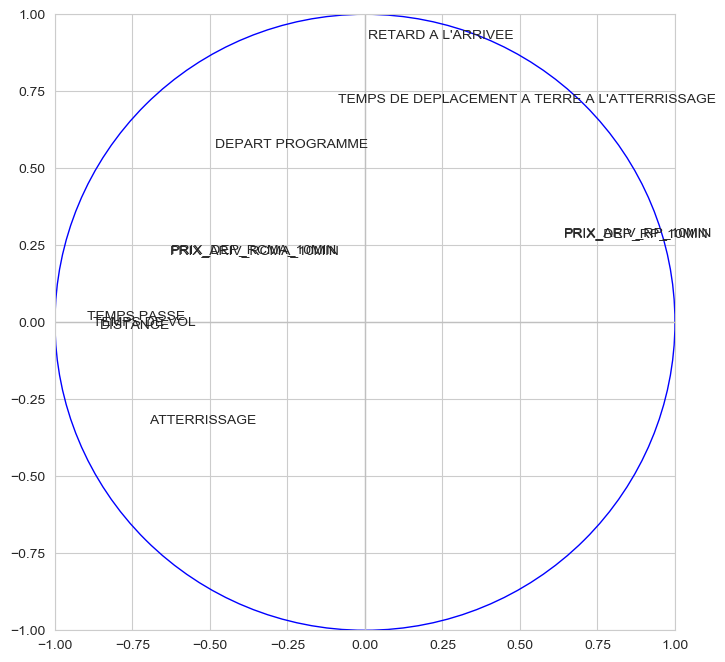

In [278]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


### Qualité de réprésentation des variables 

In [279]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                                               id    COS2_1    COS2_2
0                                     TEMPS PASSE  0.803886  0.000045
1                                    TEMPS DE VOL  0.769588  0.000128
2                                DEPART PROGRAMME  0.233100  0.321405
3                                    ATTERRISSAGE  0.487230  0.108692
4   TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE  0.007713  0.507076
5                                        DISTANCE  0.729082  0.000428
6                              RETARD A L'ARRIVEE  0.000093  0.846800
7                             PRIX_DEP_RCMA_10MIN  0.391927  0.050937
8                            PRIX_ARIV_RCMA_10MIN  0.396236  0.049904
9                               PRIX_DEP_RP_10MIN  0.410749  0.077624
10                             PRIX_ARIV_RP_10MIN  0.410206  0.078123


In [280]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))


                                               id     CTR_1     CTR_2
0                                     TEMPS PASSE  0.173258  0.000022
1                                    TEMPS DE VOL  0.165866  0.000063
2                                DEPART PROGRAMME  0.050239  0.157462
3                                    ATTERRISSAGE  0.105011  0.053250
4   TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE  0.001662  0.248425
5                                        DISTANCE  0.157136  0.000210
6                              RETARD A L'ARRIVEE  0.000020  0.414862
7                             PRIX_DEP_RCMA_10MIN  0.084471  0.024955
8                            PRIX_ARIV_RCMA_10MIN  0.085399  0.024449
9                               PRIX_DEP_RP_10MIN  0.088527  0.038030
10                             PRIX_ARIV_RP_10MIN  0.088410  0.038274


## Deuxième méthode avec les villes

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(data1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [159]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.94922613e+06 3.65497926e+06 1.54424861e+05 7.81460009e+04
 4.96909849e+04 3.08074767e+04 2.44656545e+04 4.87483537e+02
 3.54316415e+01 2.73659113e+01 3.03540802e+00 1.90263951e+00
 9.28736160e-01]
[6.65636305e-01 3.06053300e-01 1.29309183e-02 6.54363261e-03
 4.16092372e-03 2.57969450e-03 2.04865575e-03 4.08199157e-05
 2.96690351e-06 2.29151162e-06 2.54172890e-07 1.59319399e-07
 7.77686401e-08]


In [161]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,7.949226e+06,67.0,67.0
1,Dim2,3.654979e+06,31.0,97.0
2,Dim3,1.544249e+05,1.0,98.0
3,Dim4,7.814600e+04,1.0,99.0
4,Dim5,4.969098e+04,0.0,100.0
5,Dim6,3.080748e+04,0.0,100.0
6,Dim7,2.446565e+04,0.0,100.0
7,Dim8,4.874835e+02,0.0,100.0
8,Dim9,3.543164e+01,0.0,100.0
9,Dim10,2.736591e+01,0.0,100.0


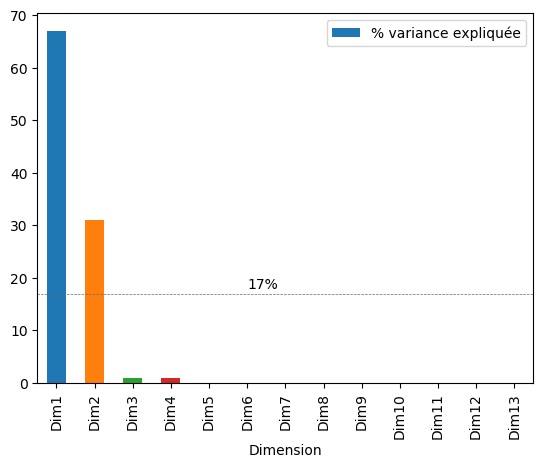

In [162]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [163]:
data_pca = pca.transform(data1)

In [164]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1],
    'id':data1.index
})

# Résultat (premières lignes)
data_pca_df.head()

,Dim1,Dim2,id
0,-3235.543083,-67.927719,Aalborg
1,-1046.950134,-2529.193884,Abu Dhabi
2,-1023.758658,1227.933138,Abuja
3,2367.692491,443.156757,Accra
4,-3112.915339,351.237060,Ad Dammam


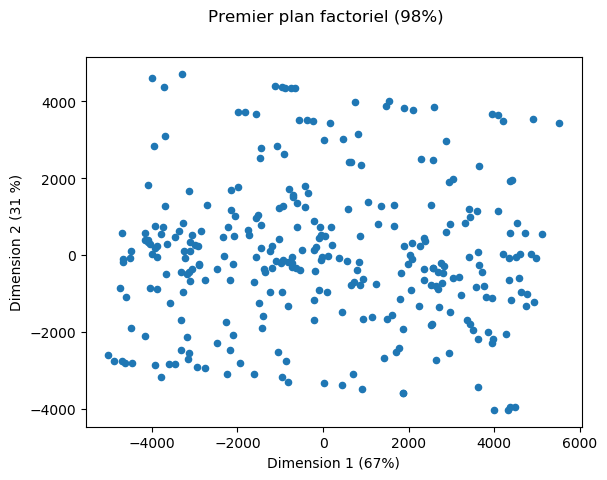

In [165]:
data_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (67%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (31 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (98%)") # titre général
plt.show()

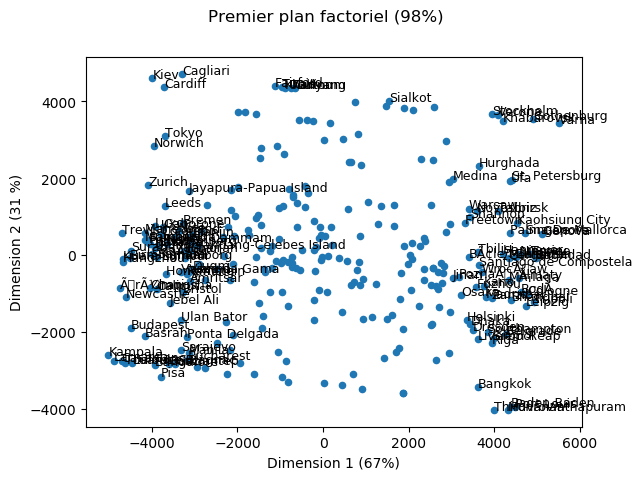

In [166]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque villes
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3000) | (abs(k[1]['Dim2']) > 4000):
        ax.annotate(k[1]["id"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (67%)") 
plt.ylabel("Dimension 2 (31 %)")
plt.suptitle("Premier plan factoriel (98%)")
plt.show()

## Classification Ascendante Hiérarchique (CAH)

In [167]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [168]:
dat = data1.iloc[:, 0:4].values

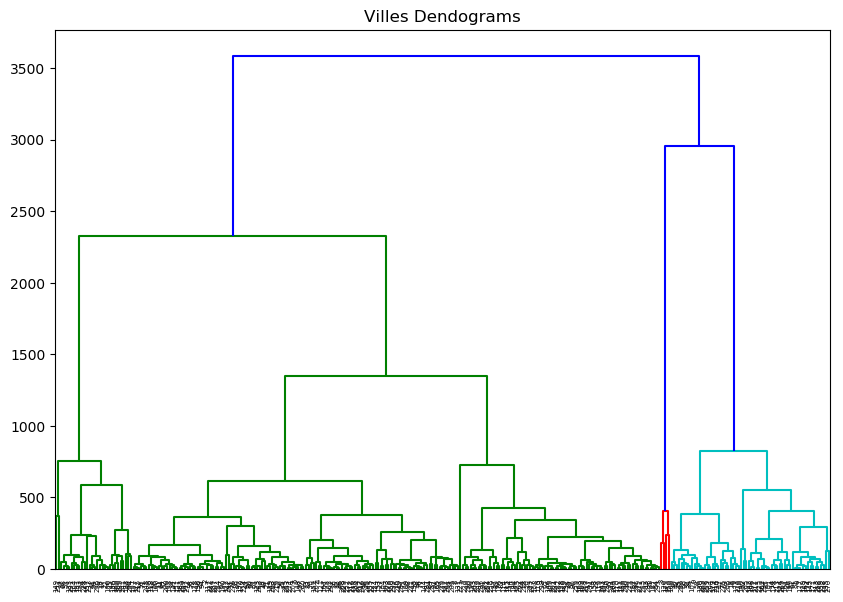

In [169]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Villes Dendograms")
dend = shc.dendrogram(shc.linkage(dat, method='ward'))

In [170]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [171]:
pd.Series(kmeans2.labels_).value_counts()

1    168
0    133
dtype: int64

In [172]:
kmeans2.cluster_centers_

array([[8.40966209e+00, 1.46017178e+03, 1.53275914e+03, 9.93709188e+01,
        7.66831338e+01, 5.00788035e+00, 5.23277480e+02, 1.45972952e+03,
        5.19715621e+00, 4.58281190e+02, 4.99700632e+02, 4.70599039e+03,
        2.42812914e+03],
       [7.73133676e+00, 1.46823580e+03, 1.56816461e+03, 1.01997290e+02,
        7.91446711e+01, 4.97912854e+00, 5.48700383e+02, 1.46628215e+03,
        4.59210013e+00, 4.32388038e+02, 4.97834759e+02, 5.15487782e+03,
        7.30717913e+03]])

In [173]:
WGI_k2 = data1.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()

,RETART DE DEPART,HEURE DE DEPART,HEURE D'ARRIVEE,TEMPS PASSE,TEMPS DE VOL,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,DISTANCE,DEPART PROGRAMME,RETARD A L'ARRIVEE,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN
classe,,,,,,,,,,,,,
0,8.409662,1460.171778,1532.759140,99.370919,76.683134,5.007880,523.277480,1459.729525,5.197156,458.281190,499.700632,4705.990389,2428.129142
1,7.731337,1468.235800,1568.164607,101.997290,79.144671,4.979129,548.700383,1466.282149,4.592100,432.388038,497.834759,5154.877823,7307.179129


En combinant ces informations avec l'ACP, on peut représenter ces 2 classes sur le plan factoriel. On voit bien la séparation horizontale des 2 classes.

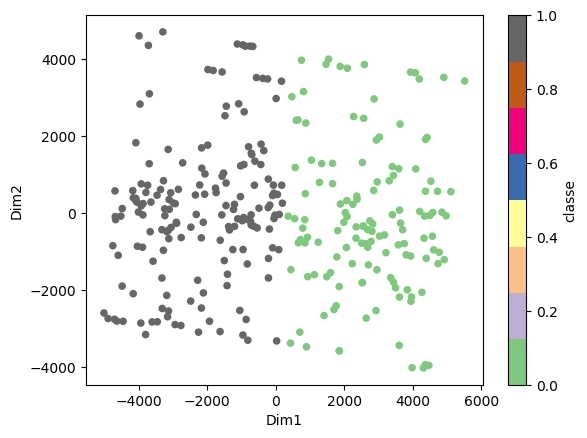

In [174]:
WGI_pca_k2 = data_pca_df.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

## Modèle de prédiction

In [178]:
df.head() 

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,VILLES,PAYS,year,month,day,week,n_days,Days,Months,Week,DELAY_LEVEL,RetArr15
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,2016-10-04,10,NVPPA,4582,5499,586,120,Dakar,SN,2016,10,4,40,17078,Mar,Oct,Weekdays,0,0
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,2018-07-16,10,COA,4778,3147,12,278,Bournemouth,GB,2018,7,16,29,17728,Lun,Jul,Weekdays,0,0
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,2018-06-01,10,NA,352,2066,849,795,Jinan,CN,2018,6,1,22,17683,Ven,Jun,Weekdays,1,0
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,84.0,69.0,50.0,337,2323.0,5.0,2350,2328.0,-22.0,0,0,2016-09-01,10,THA,5077,2151,48,685,Berlin,DE,2016,9,1,35,17045,Jeu,Sep,Weekdays,0,0
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,71.0,66.0,45.0,252,1818.0,7.0,1841,1825.0,-16.0,0,0,2016-01-23,10,MAF,2143,8346,434,353,Aalborg,DK,2016,1,23,3,16823,Sam,Jan,Weekend,0,0


In [281]:
df1=df[["TEMPS PASSE","TEMPS DE VOL","DEPART PROGRAMME","ATTERRISSAGE","TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE","DISTANCE","RETARD A L'ARRIVEE","PRIX_DEP_RCMA_10MIN", "PRIX_ARIV_RCMA_10MIN", "PRIX_DEP_RP_10MIN","PRIX_ARIV_RP_10MIN","AEROPORT DEPART","AEROPORT ARRIVEE","COMPAGNIE AERIENNE","month","day","DELAY_LEVEL","RetArr15"]]
df1.head()

,TEMPS PASSE,TEMPS DE VOL,DEPART PROGRAMME,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,DISTANCE,RETARD A L'ARRIVEE,PRIX_DEP_RCMA_10MIN,PRIX_ARIV_RCMA_10MIN,PRIX_DEP_RP_10MIN,PRIX_ARIV_RP_10MIN,AEROPORT DEPART,AEROPORT ARRIVEE,COMPAGNIE AERIENNE,month,day,DELAY_LEVEL,RetArr15
0,227.0,197.0,1410,2048.0,10.0,1749,-1.0,586,120,4582,5499,TIA,DSS,NVPPA,10,4,0,0
1,191.0,173.0,1455,1857.0,3.0,1325,-25.0,12,278,4778,3147,MPM,BOH,COA,7,16,0,0
2,220.0,205.0,1540,1841.0,6.0,1520,12.0,849,795,352,2066,TRN,TNA,NA,6,1,1,0
3,69.0,50.0,2226,2323.0,5.0,337,-22.0,48,685,5077,2151,BRU,SXF,THA,9,1,0,0
4,66.0,45.0,1730,1818.0,7.0,252,-16.0,434,353,2143,8346,VCE,AAL,MAF,1,23,0,0


In [88]:
df1.shape

(2940415, 17)

In [107]:
#import model libraries
import scipy.stats as st
from sklearn.preprocessing import StandardScaler 


In [90]:
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectKBest, chi2

In [286]:
y = df1["RETARD A L'ARRIVEE"]
X = df1.drop(["RETARD A L'ARRIVEE"], axis=1)

In [287]:
CategLs = ["AEROPORT DEPART","AEROPORT ARRIVEE","COMPAGNIE AERIENNE","month","day", "RetArr15"] # Categorical features
for fea in X[CategLs]: # Loop through all columns in the dataframe
    X[fea] = pd.Categorical(X[fea]).codes # Convert to categorical features

In [288]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [289]:
%%time
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle= True)


n_estimators = 10
max_features = 10
min_samples_split = 5
bootstrap = True

regt = ExtraTreesRegressor(n_estimators=n_estimators,
                            max_features=max_features,
                            min_samples_split = min_samples_split,
                            n_jobs=1,
                            random_state=10)

scores = cross_val_score(regt, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error',n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

log RMSE: 11.7545 +/-0.5051
Wall time: 5min 2s


In [290]:
modelt = regt.fit(X_train, y_train)
model_testt = modelt.score(X_test, y_test)
print("Accuracy of the regression model:", model_testt)

prediction = modelt.predict(X_test)

Accuracy of the regression model: 0.9170999977478708


In [291]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

regl = LinearRegression()

scores = cross_val_score(regl, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

log RMSE: 28.3030 +/-0.3230
Wall time: 9 s


In [292]:
modell = regl.fit(X_train, y_train)
model_testl = modell.score(X_test, y_test)
print("Accuracy of the regression model:", model_testl)

prediction = modell.predict(X_test)

Accuracy of the regression model: 0.5240281900568962


In [293]:
from sklearn.metrics import mean_absolute_error

In [294]:
print("MAE: %.4f" % mean_absolute_error(y_test, regt.predict(X_test)))

MAE: 5.6881


In [295]:
print("MAE: %.4f" % mean_absolute_error(y_test, regl.predict(X_test)))

MAE: 13.0124


In [296]:
from sklearn.metrics import mean_squared_error

In [297]:
print("MSE =", mean_squared_error(y_test, regt.predict(X_test)))

MSE = 144.38158029197785


In [298]:
print("MSE =", mean_squared_error(y_test, regl.predict(X_test)))

MSE = 828.9693634146221
